# HDBSCAN:

### Learning Resources:

[HDBSCAN documentation]()

[HDBSCAN presentation]()

### Example Projects:

[The Simple Case](https://hdbscan.readthedocs.io/en/latest/basic_hdbscan.html#the-simple-case)

Preparing our activities and symptoms data:

In [96]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs

## Data from the dataset:

#### Import duke activities:

In [105]:
duke_enriched_df = pd.read_json("./data/remedies.json")
activities_df = pd.read_json("./data/symptoms.json")

In [59]:
duke_enriched_df.head()

,remedyName,medicinalUses,commonNames,family,genus,species,vernacularNames,treatmentClinical,treatmentTraditional,treatmentFolk,contraindication,warnings,adverseEffects,posology,ratingAverage,totalNumberofRatings,popularityScore
0,Abelmoschus esculentus,"Abortifacient,Antidote,Boil,Burn,Catarrh,Coffe...","Huang Shu K'Uei,Bamia,Molondron,Quiabeiro,Gomb...",Malvaceae,Abelmoschus,esculentus,None,None,None,None,None,None,None,None,NaN,NaN,NaN
1,Abelmoschus manihot,"Antitussive,Boil,Cancer,Cancer(Stomach),Catarr...","Tororo-Aoi,Kastuli",Malvaceae,Abelmoschus,manihot,None,None,None,None,None,None,None,None,NaN,NaN,NaN
2,Abelmoschus moschatus,"Aphrodisiac,Asthma,Bite(Snake),Boil,Cancer,Car...","Musk Mallow,Moskus,Muskus,Mushk Dana,Ambercice...",Malvaceae,Abelmoschus,moschatus,None,None,None,None,None,None,None,None,NaN,NaN,NaN
3,Abies alba,"Bronchitis,Bruise,Calculus,Catarrh,Cough,Diure...","Abeto,Edeltanne,Beyaz Koknar,Silver Fir,Abeto ...",Pinaceae,Abies,alba,None,None,None,None,None,None,None,None,NaN,NaN,NaN
4,Abies balsamea,"Burn,Cancer,Cold,Cough,Heart,Masticatory,Sore,...","Balsam,Canada,Balsam Fir,Fir",Pinaceae,Abies,balsamea,None,None,None,None,None,None,None,None,NaN,NaN,NaN


In [106]:
activities_df.shape

(2109, 1)

In [107]:
activities_df.head()

,symptomName
0,Abcess
1,Abdomen
2,Abortifacient
3,Abortive
4,Abrasion


#### Import other list of symptoms:

In [65]:
gb_symptoms_df = pd.read_csv("./data/2022_country_weekly_2022_GB_weekly_symptoms_dataset.csv")

In [68]:
df_columns = list(gb_symptoms_df.columns)
print(df_columns[:15])

symptoms = list()

for col in df_columns:
    if "symptom:" not in col:
        continue
    col = col.replace("symptom:", "")
    col = col.capitalize()
    symptoms.append(col)

['country_region_code', 'country_region', 'sub_region_1', 'sub_region_1_code', 'sub_region_2', 'sub_region_2_code', 'place_id', 'date', 'symptom:Abdominal obesity', 'symptom:Abdominal pain', 'symptom:Acne', 'symptom:Actinic keratosis', 'symptom:Acute bronchitis', 'symptom:Adrenal crisis', 'symptom:Ageusia']


In [77]:
symptoms

['Abdominal obesity',
 'Abdominal pain',
 'Acne',
 'Actinic keratosis',
 'Acute bronchitis',
 'Adrenal crisis',
 'Ageusia',
 'Alcoholism',
 'Allergic conjunctivitis',
 'Allergy',
 'Amblyopia',
 'Amenorrhea',
 'Amnesia',
 'Anal fissure',
 'Anaphylaxis',
 'Anemia',
 'Angina pectoris',
 'Angioedema',
 'Angular cheilitis',
 'Anosmia',
 'Anxiety',
 'Aphasia',
 'Aphonia',
 'Apnea',
 'Arthralgia',
 'Arthritis',
 'Ascites',
 'Asperger syndrome',
 'Asphyxia',
 'Asthma',
 'Astigmatism',
 'Ataxia',
 'Atheroma',
 'Attention deficit hyperactivity disorder',
 'Auditory hallucination',
 'Autoimmune disease',
 'Avoidant personality disorder',
 'Back pain',
 'Bacterial vaginosis',
 'Balance disorder',
 "Beau's lines",
 "Bell's palsy",
 'Biliary colic',
 'Binge eating',
 'Bleeding',
 'Bleeding on probing',
 'Blepharospasm',
 'Bloating',
 'Blood in stool',
 'Blurred vision',
 'Blushing',
 'Boil',
 'Bone fracture',
 'Bone tumor',
 'Bowel obstruction',
 'Bradycardia',
 'Braxton hicks contractions',
 'Break

#### Concatenate duke activities and symptoms:

In [120]:
# activities = symptoms_df.values.tolist()
symptoms_df = pd.DataFrame(symptoms)
symptoms_df.rename(columns={0: "symptomName"}, inplace=True)
symptoms_df[["is_symptom", "is_activity"]] = (1, 0)
symptoms_df.head()

,symptomName,is_symptom,is_activity
0,Abdominal obesity,1,0
1,Abdominal pain,1,0
2,Acne,1,0
3,Actinic keratosis,1,0
4,Acute bronchitis,1,0


In [121]:
activities_df[["is_symptom", "is_activity"]] = (0, 1)
activities_df.head()

,symptomName,is_symptom,is_activity
0,Abcess,0,1
1,Abdomen,0,1
2,Abortifacient,0,1
3,Abortive,0,1
4,Abrasion,0,1


Only take the unique values!

In [198]:
print(len(activities_df))
print(len(symptoms_df))
activities_symptoms_df = pd.concat([activities_df, symptoms_df],axis=0)
print("Should be:", len(activities_df) + len(symptoms_df))
print("Is:", len(activities_symptoms_df))
activities_symptoms_df.reset_index(inplace=True)
activities_symptoms_df.drop(labels="index", axis=1, inplace=True)
activities_symptoms_df.head()

2109
422
Should be: 2531
Is: 2531


,symptomName,is_symptom,is_activity
0,Abcess,0,1
1,Abdomen,0,1
2,Abortifacient,0,1
3,Abortive,0,1
4,Abrasion,0,1


However, actually not all unique (combinations are, but some symptomNames were present in both):

In [199]:
activities_symptoms_df.nunique()

symptomName    2404
is_symptom        2
is_activity       2
dtype: int64

In [200]:
activities_symptoms_df["symptomName"]

0              Abcess
1             Abdomen
2       Abortifacient
3            Abortive
4            Abrasion
            ...      
2526        Xeroderma
2527       Xerostomia
2528             Yawn
2529    Hyperhidrosis
2530     Pancreatitis
Name: symptomName, Length: 2531, dtype: object

In [202]:
activities_symptoms_df["symptomName"].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2526    False
2527    False
2528    False
2529    False
2530    False
Name: symptomName, Length: 2531, dtype: bool

In [203]:
duplicate_activities = (activities_symptoms_df["symptomName"].duplicated("last"))
filt_df = activities_symptoms_df[duplicate_activities]
filt_df

,symptomName,is_symptom,is_activity
23,Acne,0,1
38,Alcoholism,0,1
43,Allergy,0,1
47,Amblyopia,0,1
49,Amenorrhea,0,1
...,...,...,...
1837,Wheeze,0,1
1996,Hypertrophy,0,1
1997,Hypoglycemia,0,1
2035,Purpura,0,1


In [204]:
duplicate_symptoms = (activities_symptoms_df["symptomName"].duplicated("first"))
filt_df = activities_symptoms_df[duplicate_symptoms]
filt_df

,symptomName,is_symptom,is_activity
2111,Acne,1,0
2116,Alcoholism,1,0
2118,Allergy,1,0
2119,Amblyopia,1,0
2120,Amenorrhea,1,0
...,...,...,...
2517,Vertigo,1,0
2520,Vomiting,1,0
2521,Wart,1,0
2523,Weakness,1,0


In [208]:
duplicate_indices = filt_df.index
duplicate_indices

Int64Index([2111, 2116, 2118, 2119, 2120, 2121, 2124, 2129, 2133, 2134,
            ...
            2500, 2502, 2503, 2505, 2512, 2517, 2520, 2521, 2523, 2525],
           dtype='int64', length=127)

#### Adding a 1 to is_symptom for activities that are also symptoms:

In [209]:
activities_symptoms_df.loc[duplicate_activities, ["is_symptom"]] = 1
activities_symptoms_df[duplicate_activities].head()

,symptomName,is_symptom,is_activity
23,Acne,1,1
38,Alcoholism,1,1
43,Allergy,1,1
47,Amblyopia,1,1
49,Amenorrhea,1,1


In [210]:
activities_symptoms_df.iloc[23]

symptomName    Acne
is_symptom        1
is_activity       1
Name: 23, dtype: object

In [211]:
activities_symptoms_df.drop_duplicates(subset="symptomName")

,symptomName,is_symptom,is_activity
0,Abcess,0,1
1,Abdomen,0,1
2,Abortifacient,0,1
3,Abortive,0,1
4,Abrasion,0,1
...,...,...,...
2526,Xeroderma,1,0
2527,Xerostomia,1,0
2528,Yawn,1,0
2529,Hyperhidrosis,1,0


In [212]:
activities_symptoms_df.drop_duplicates(subset="symptomName", inplace=True)

In [213]:
activities_symptoms_df.head()

,symptomName,is_symptom,is_activity
0,Abcess,0,1
1,Abdomen,0,1
2,Abortifacient,0,1
3,Abortive,0,1
4,Abrasion,0,1


Verifying results:

In [214]:
filt = (activities_symptoms_df["is_symptom"] == 1) & (activities_symptoms_df["is_activity"] == 1)
filt_df = activities_symptoms_df[filt]
filt_df

,symptomName,is_symptom,is_activity
23,Acne,1,1
38,Alcoholism,1,1
43,Allergy,1,1
47,Amblyopia,1,1
49,Amenorrhea,1,1
...,...,...,...
1837,Wheeze,1,1
1996,Hypertrophy,1,1
1997,Hypoglycemia,1,1
2035,Purpura,1,1


Resetting index:

In [225]:
activities_symptoms_df.reset_index(inplace=True)
activities_symptoms_df.drop(labels=["index"], axis=1, inplace=True)
activities_symptoms_df


,symptomName,is_symptom,is_activity
0,Abcess,0,1
1,Abdomen,0,1
2,Abortifacient,0,1
3,Abortive,0,1
4,Abrasion,0,1
...,...,...,...
2399,Xeroderma,1,0
2400,Xerostomia,1,0
2401,Yawn,1,0
2402,Hyperhidrosis,1,0


Export to csv

In [226]:
activities_symptoms_df.to_csv("./activities_symptoms_bool.csv")

In [95]:
# activities_symptoms_series = pd.Series(activities_symptoms_series)
# activities_symptoms_series.to_csv("./activities_symptoms.csv")

#### Column indicating Activity and Symptom:

In [2]:
import hdbscan

## Basic Examples:

### The Simple case:

Let’s generate some data with, say 2000 samples, and 10 features. We can put it in a dataframe for a nice clean table view of it.

In [3]:
blobs, labels = make_blobs(n_samples=2000, n_features=10)

In [4]:
pd.DataFrame(blobs).head()

,0,1,2,3,4,5,6,7,8,9
0,-6.841507,3.286342,0.808353,-5.106997,-1.062397,-1.897772,7.438953,2.538066,-4.591760,-4.629555
1,5.520088,-1.886680,5.016108,7.831012,3.861091,7.279307,2.942494,8.345819,3.837994,5.263654
2,8.100003,-0.665917,3.219610,6.052445,3.353612,10.643114,0.776334,8.604085,4.653598,6.478202
3,-6.122964,10.313259,-9.520429,8.648169,7.952367,-1.411614,-8.411020,0.554815,-3.971506,5.695172
4,-5.761570,3.193165,1.555291,-5.717050,-1.025543,-1.598270,4.822401,4.456468,-3.363951,-4.821758


#### Clustering Object:

Now, to cluster we need to generate a clustering object.

In [5]:
clusterer = hdbscan.HDBSCAN()

We can then use this clustering object and fit it to the data we have. This will return the clusterer object back to you – just in case you want do some method chaining.

In [6]:
clusterer.fit(blobs)

HDBSCAN()

In [9]:
# HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,
#     gen_min_span_tree=False, leaf_size=40, memory=Memory(cachedir=None),
#     metric='euclidean', min_cluster_size=5, min_samples=None, p=None)

At this point we are actually done! We’ve done the clustering! But where are the results? How do I get the clusters? The clusterer object knows, and stores the result in an attribute labels_.

In [15]:
clusterer.labels_

array([1, 2, 2, ..., 1, 0, 0])

#### Interpreting the results:

So it is an array of integers. What are we to make of that? It is an array with an integer for each data sample. Samples that are in the same cluster get assigned the same number. The cluster labels start at 0 and count up. We can thus determine the number of clusters found by finding the largest cluster label.

In [11]:
clusterer.labels_.max()

2

So we have a total of three clusters, with labels 0, 1, and 2. Importantly HDBSCAN is noise aware – it has a notion of data samples that are not assigned to any cluster. This is handled by assigning these samples the label -1. But wait, there’s more. The hdbscan library implements soft clustering, where each data point is assigned a cluster membership score ranging from 0.0 to 1.0. A score of 0.0 represents a sample that is not in the cluster at all (all noise points will get this score) while a score of 1.0 represents a sample that is at the heart of the cluster (note that this is not the spatial centroid notion of core). You can access these scores via the probabilities_ attribute.

In [12]:
clusterer.probabilities_

array([0.81582832, 0.54275279, 0.73984796, ..., 0.69335535, 0.58510736,
       0.72976019])

What exactly is this? 1 indicates that it is at the heart of _what_ cluster?

In [13]:
len(clusterer.probabilities_)

2000

Still just 2000 values, so each entry was assigned a single score.

### Different Metrics:

That is all well and good, but even data that is embedded in a vector space may not want to consider distances between data points to be pure Euclidean distance. What can we do in that case? We are still in good shape, since hdbscan supports a wide variety of metrics, which you can set when creating the clusterer object. For example we can do the following:

In [16]:
clusterer = hdbscan.HDBSCAN(metric='manhattan')
clusterer.fit(blobs)
clusterer.labels_

array([2, 1, 1, ..., 2, 0, 0])

#### Supported metrics:

What metrics are supported? Because we simply steal metric computations from sklearn we get a large number of metrics readily available.

In [18]:
hdbscan.dist_metrics.METRIC_MAPPING

{'euclidean': hdbscan.dist_metrics.EuclideanDistance,
 'l2': hdbscan.dist_metrics.EuclideanDistance,
 'minkowski': hdbscan.dist_metrics.MinkowskiDistance,
 'p': hdbscan.dist_metrics.MinkowskiDistance,
 'manhattan': hdbscan.dist_metrics.ManhattanDistance,
 'cityblock': hdbscan.dist_metrics.ManhattanDistance,
 'l1': hdbscan.dist_metrics.ManhattanDistance,
 'chebyshev': hdbscan.dist_metrics.ChebyshevDistance,
 'infinity': hdbscan.dist_metrics.ChebyshevDistance,
 'seuclidean': hdbscan.dist_metrics.SEuclideanDistance,
 'mahalanobis': hdbscan.dist_metrics.MahalanobisDistance,
 'wminkowski': hdbscan.dist_metrics.WMinkowskiDistance,
 'hamming': hdbscan.dist_metrics.HammingDistance,
 'canberra': hdbscan.dist_metrics.CanberraDistance,
 'braycurtis': hdbscan.dist_metrics.BrayCurtisDistance,
 'matching': hdbscan.dist_metrics.MatchingDistance,
 'jaccard': hdbscan.dist_metrics.JaccardDistance,
 'dice': hdbscan.dist_metrics.DiceDistance,
 'kulsinski': hdbscan.dist_metrics.KulsinskiDistance,
 'rogerst

### Distance matrices:

What if you don’t have a nice set of points in a vector space, but only have a pairwise distance matrix providing the distance between each pair of points? This is a common situation. Perhaps you have a complex custom distance measure; perhaps you have strings and are using Levenstein distance, etc. Again, this is all fine as hdbscan supports a special metric called precomputed. If you create the clusterer with the metric set to precomputed then the clusterer will assume that, rather than being handed a vector of points in a vector space, it is recieving an all pairs distance matrix. Missing distances can be indicated by numpy.inf, which leads HDBSCAN to ignore these pairwise relationships as long as there exists a path between two points that contains defined distances (i.e. if there are too many distances missing, the clustering is going to fail).

NOTE: The input vector _must_ contain numerical data. If you have a distance matrix for non-numerical vectors, you will need to map your input vectors to numerical vectors. (e.g use map [‘A’, ‘G’, ‘C’, ‘T’]-> [ 1, 2, 3, 4] to replace input vector [‘A’, ‘A’, ‘A’, ‘C’, ‘G’] with [ 1, 1, 1, 3, 2])

In [19]:
from sklearn.metrics.pairwise import pairwise_distances

In [20]:
distance_matrix = pairwise_distances(blobs)
clusterer = hdbscan.HDBSCAN(metric='precomputed')
clusterer.fit(distance_matrix)
clusterer.labels_

array([1, 2, 2, ..., 1, 0, 0])

##### Note: Look at a Distance Matrix:

A distance matrix contains an array with distance values to each other data point, for each entry. So shape is 2000x2000.

In [21]:
distance_matrix

array([[ 0.        , 26.3820097 , 28.91430987, ...,  6.19048856,
        28.91422866, 29.94995868],
       [26.3820097 ,  0.        ,  5.74534136, ..., 25.9131533 ,
        29.22827793, 30.44046566],
       [28.91430987,  5.74534136,  0.        , ..., 28.13069749,
        30.11410165, 31.1032506 ],
       ...,
       [ 6.19048856, 25.9131533 , 28.13069749, ...,  0.        ,
        30.90369304, 31.80907962],
       [28.91422866, 29.22827793, 30.11410165, ..., 30.90369304,
         0.        ,  5.22772503],
       [29.94995868, 30.44046566, 31.1032506 , ..., 31.80907962,
         5.22772503,  0.        ]])

In [24]:
print(len(distance_matrix))
len(distance_matrix[0])

2000


2000

## Advanced examples:

### Getting More Information About a Clustering:

Once you have the basics of clustering sorted you may want to dig a little deeper than just the cluster labels returned to you. Fortunately, the hdbscan library provides you with the facilities to do this. During processing HDBSCAN* builds a hierarchy of potential clusters, from which it extracts the flat clustering returned. It can be informative to look at that hierarchy, and potentially make use of the extra information contained therein.

Suppose we have a dataset for clustering. It is a binary file in NumPy format and it can be found at https://github.com/lmcinnes/hdbscan/blob/master/notebooks/clusterable_data.npy.

In [25]:
import hdbscan
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Loading test data:

In [26]:
data = np.load('./data/clusterable_data.npy')

In [28]:
data.shape

(2309, 2)

In [27]:
data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ...,
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

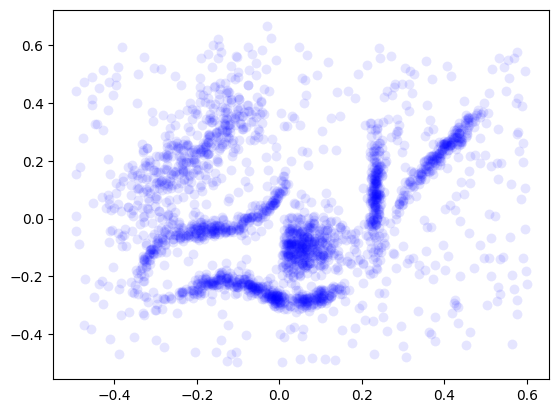

In [30]:
plt.scatter(*data.T, s=50, linewidth=0, c='b', alpha=0.1)

#### Clustering:

We can cluster the data as normal, and visualize the labels with different colors (and even the cluster membership strengths as levels of saturation)

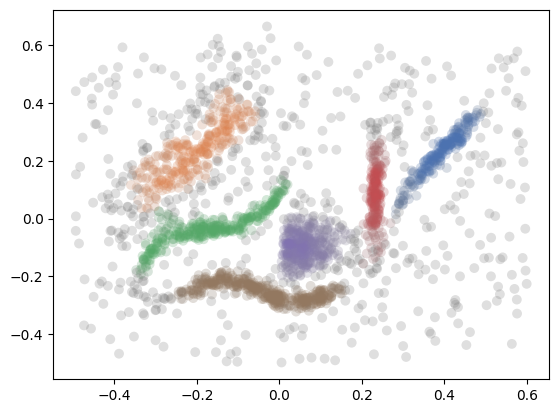

In [43]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(data)
color_palette = sns.color_palette('deep', 8)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*data.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

#### Condensed Trees:

The question now is what does the cluster hierarchy look like – which clusters are near each other, or could perhaps be merged, and which are far apart. We can access the basic hierarchy via the condensed_tree_ attribute of the clusterer object.

In [39]:
clusterer.condensed_tree_

This merely gives us a CondensedTree object. If we want to visualize the hierarchy we can call the plot() method:

<Axes: ylabel='$\\lambda$ value'>

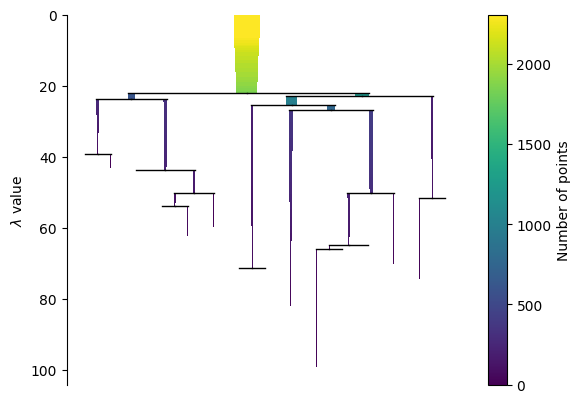

In [44]:
clusterer.condensed_tree_.plot()

We can now see the hierarchy as a dendrogram, the width (and color) of each branch representing the number of points in the cluster at that level. If we wish to know which branches were selected by the HDBSCAN* algorithm we can pass select_clusters=True. You can even pass a selection palette to color the selections according to the cluster labeling.

<Axes: ylabel='$\\lambda$ value'>

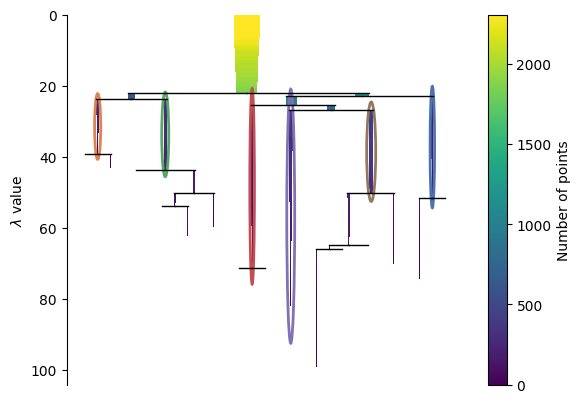

In [45]:
clusterer.condensed_tree_.plot(select_clusters=True,
                               selection_palette=sns.color_palette('deep', 8))

From this, we can see, for example, that the yellow cluster at the center of the plot forms early (breaking off from the pale blue and purple clusters) and persists for a long time. By comparison the green cluster, which also forms early, quickly breaks apart and then vanishes altogether (shattering into clusters all smaller than the min_cluster_size of 15).

You can also see that the pale blue cluster breaks apart into several subclusters that in turn persist for quite some time – so there is some interesting substructure to the pale blue cluster that is not present, for example, in the dark blue cluster.

#### Converter methods on the condensed tree:

If this was a simple visual analysis of the condensed tree can tell you a lot more about the structure of your data. This is not all we can do with condensed trees, however. For larger and more complex datasets the tree itself may be very complex, and it may be desirable to run more interesting analytics over the tree itself. This can be achieved via several converter methods: to_networkx(), to_pandas(), and to_numpy().

First we’ll consider to_networkx()

In [48]:
# g = clusterer.condensed_tree_.to_networkx()
# g.number_of_nodes()

The graph actually contains nodes for all the points falling out of clusters as well as the clusters themselves. Each node has an associated size attribute and each edge has a weight of the lambda value at which that edge forms. This allows for much more interesting analyses.

##### To pandas:

Next, we have the to_pandas() method, which returns a panda DataFrame where each row corresponds to an edge of the NetworkX graph:

In [49]:
clusterer.condensed_tree_.to_pandas().head()

,parent,child,lambda_val,child_size
0,2309,2048,5.016526,1
1,2309,2006,5.076503,1
2,2309,2024,5.279133,1
3,2309,2050,5.347332,1
4,2309,1992,5.381930,1


Here the parent denotes the id of the parent cluster, the child the id of the child cluster (or, if the child is a single data point rather than a cluster, the index in the dataset of that point), the lambda_val provides the lambda value at which the edge forms, and the child_size provides the number of points in the child cluster. As you can see the start of the DataFrame has singleton points falling out of the root cluster, with each child_size equal to 1.

If you want just the clusters, rather than all the individual points as well, simply select the rows of the DataFrame with child_size greater than 1.

In [57]:
tree = clusterer.condensed_tree_.to_pandas()
cluster_tree = tree[tree.child_size > 1]
print(cluster_tree.shape)
cluster_tree.head(28)

(28, 4)


,parent,child,lambda_val,child_size
468,2309,2310,22.149180,625
469,2309,2311,22.149180,1216
495,2311,2312,22.974381,1004
496,2311,2313,22.974381,200
560,2310,2314,23.727882,275
561,2310,2315,23.727882,316
575,2312,2316,25.366360,208
576,2312,2317,25.366360,772
631,2317,2318,26.892063,356
632,2317,2319,26.892063,406


Finally we have the to_numpy() function, which returns a numpy record array:

In [52]:
clusterer.condensed_tree_.to_numpy()

array([(2309, 2048,  5.01652597, 1), (2309, 2006,  5.07650313, 1),
       (2309, 2024,  5.27913306, 1), ..., (2318, 1105, 86.55073707, 1),
       (2318,  965, 86.55073707, 1), (2318,  954, 86.55073707, 1)],
      dtype=[('parent', '<i8'), ('child', '<i8'), ('lambda_val', '<f8'), ('child_size', '<i8')])

### Converting text to vectors

In order to feed predictive or clustering models with the text data, one first need to turn the text into vectors of numerical values suitable for statistical analysis. This can be achieved with the utilities of the sklearn.feature_extraction.text as demonstrated in the following example that extract TF-IDF vectors of unigram tokens from a subset of 20news:

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
categories = ['alt.atheism', 'talk.religion.misc',
              'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      categories=categories)
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(2034, 34118)

Can this just be applied to activities and symptoms? This simply seems to extract counts etc.